In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import svm
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from scipy.stats import norm
%matplotlib inline 
import seaborn as sns 
from sklearn.datasets import make_circles

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid") 

/Users/orperets/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### What is Outlier Detection?

Outlier Detection (or Anomaly Detection) - explore observations which appears to be inconsistent with the remainder of that set of data.


### Applications

- <b>Fraud detection</b> - detecting fraudulent applications for credit cards, state benefits or detecting fraudulent usage of credit cards or mobile phones.

- <b>Loan application processing</b> - to detect fraudulent applications or potentially problematical customers.

- <b>Intrusion detection</b> - detecting unauthorised access in computer networks.

- <b>Activity monitoring</b> - detecting mobile phone fraud by monitoring phone activity or suspicious trades in the equity markets.

- <b>Network performance</b> - monitoring the performance of computer networks, for example to detect network bottlenecks.

- <b>Detecting novelties in images</b> - for robot neotaxis or surveillance systems.

- <b>Detecting unexpected entries in databases</b> - for data mining to detect errors, frauds or valid but unexpected entries.

- Detecting mislabelled data in a training data set.

### Approaches


#### The most common case - determine the outliers with <b>no prior</b> knowledge of the data. This is analogous to unsupervised clustering.


Text(0.5, 1.0, 'In 2D the outliers can be detected easily')

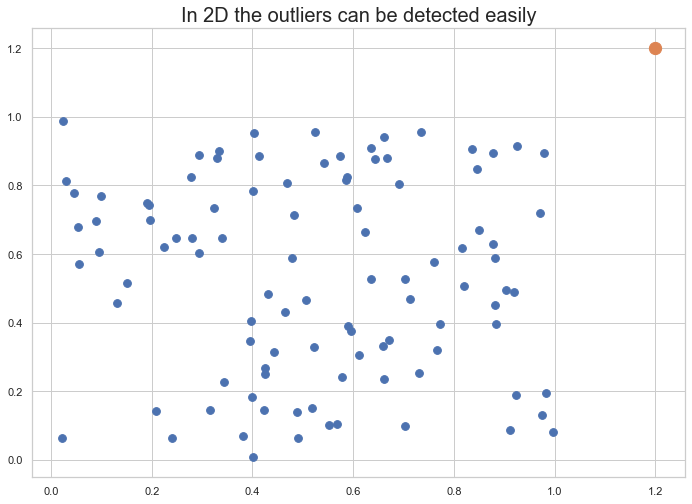

In [2]:
X = np.random.random(size=(100,2))
plt.scatter(X[:,0], X[:,1], s=60)
plt.scatter([1.2], [1.2], s=150)
plt.title("In 2D the outliers can be detected easily", fontsize=20)

### Outlier Detection Algorithms
- Isolation Forest
- Local Outlier Factor
- One Class SVM
- DBSCAN
- and more..

### Load Data

In [3]:
# https://www.kaggle.com/abcsds/pokemon
data = pd.read_csv('Pokemon.csv')

In [4]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Isolation Forest
- Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In order to create a branch in the tree, first, a random feature is selected. Afterward, a random split value (between min and max value) is chosen for that feature. If the given observation has a lower value of this feature then the one selected it follows the left branch, otherwise the right one. This process is continued until a single point is isolated or specified maximum depth is reached.

- In principle, <b>outliers are less frequent than regular observations</b> and are different from them in terms of values (they lie further away from the regular observations in the feature space). 

- That is why by using such random partitioning they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation must pass in the tree going from the root to the terminal node), with fewer splits necessary.


<img width=600 height=600 src="https://content.linkedin.com/content/dam/engineering/site-assets/images/blog/posts/2019/08/IsolationForest1.png">


In [5]:
X = data[["HP", "Speed"]]
X

,HP,Speed
0,45,45
1,60,60
2,80,80
3,80,80
4,39,65
...,...,...
795,50,50
796,50,110
797,80,70
798,80,80


In [6]:
clf = IsolationForest(max_samples='auto', random_state = 1)
preds = clf.fit_predict(X)
data['isoletionForest_outliers'] = preds
data['isoletionForest_outliers'] = data['isoletionForest_outliers'].astype(str)
data['isoletionForest_scores'] = clf.decision_function(X)
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,isoletionForest_outliers,isoletionForest_scores
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,0.075719
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,0.103067
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,0.087821
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,0.087821
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1,0.069864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1,0.090617
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1,0.016078
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1,0.093772
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1,0.087821


In [7]:
data['isoletionForest_outliers'].value_counts()

1     654
-1    146
Name: isoletionForest_outliers, dtype: int64

Let's plot the resluts

<AxesSubplot:xlabel='HP', ylabel='Speed'>

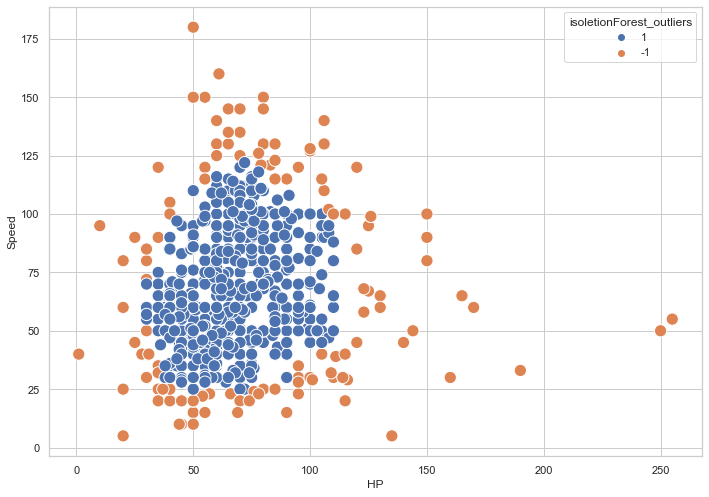

In [8]:
sns.scatterplot(data=data, x="HP", y="Speed", hue="isoletionForest_outliers", s=150)

<AxesSubplot:xlabel='HP', ylabel='Speed'>

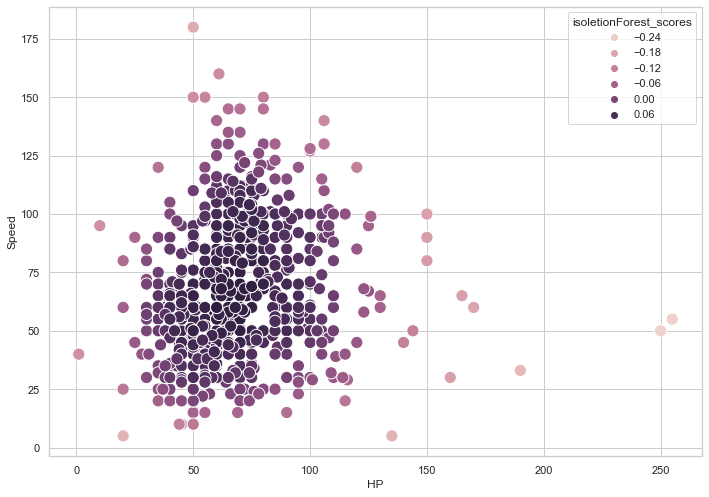

In [9]:
sns.scatterplot(data=data, x="HP", y="Speed", hue="isoletionForest_scores", s=150)

## Local Outlier Factor

- The anomaly score of each sample is called the Local Outlier Factor. 
- It measures the local deviation of the density of a given sample with respect to its neighbors. 
- It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. 
- More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. 
- By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors.

<img width=400 height=300 src="dbscan.png">

<img width=400 height=400 src="https://www.researchgate.net/publication/348112285/figure/fig4/AS:976150092316673@1609743726200/Finding-Local-Outlier-Factor-LOF-for-probable-outliers-of-a-normal-cluster.png">

Generally:

the LOF of a point tells the density of this point compared to the density of its neighbors. 

If the density of a point is much smaller than the densities of its neighbors (LOF ≫1), the point is far from dense areas and, hence, an outlier.

* $LOF \approx 1$ means no-outlier.
* $LOF > 1$ means noutlier.


In [10]:
clf = LocalOutlierFactor(n_neighbors=11)
y_pred = clf.fit_predict(X)

data['localOutlierFactor_outliers'] = y_pred.astype(str)
data['localOutlierFactor_scores'] = clf.negative_outlier_factor_

In [11]:
data['localOutlierFactor_outliers'].value_counts()

1     781
-1     19
Name: localOutlierFactor_outliers, dtype: int64

<AxesSubplot:xlabel='HP', ylabel='Speed'>

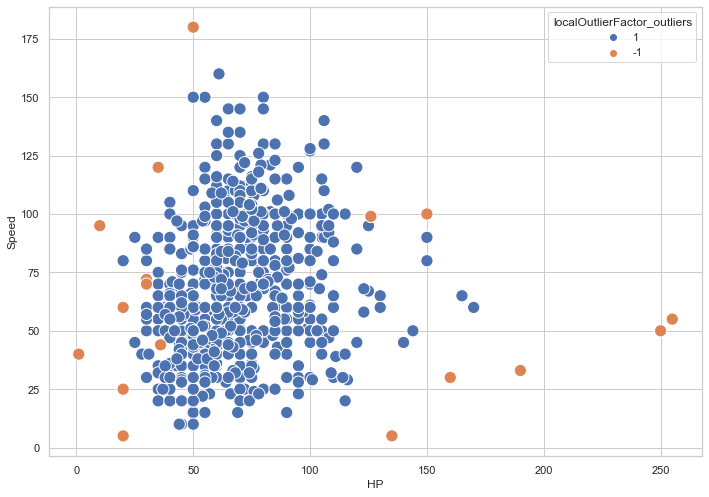

In [12]:
sns.scatterplot(data=data, x="HP", y="Speed", hue="localOutlierFactor_outliers", s=150)

<AxesSubplot:xlabel='HP', ylabel='Speed'>

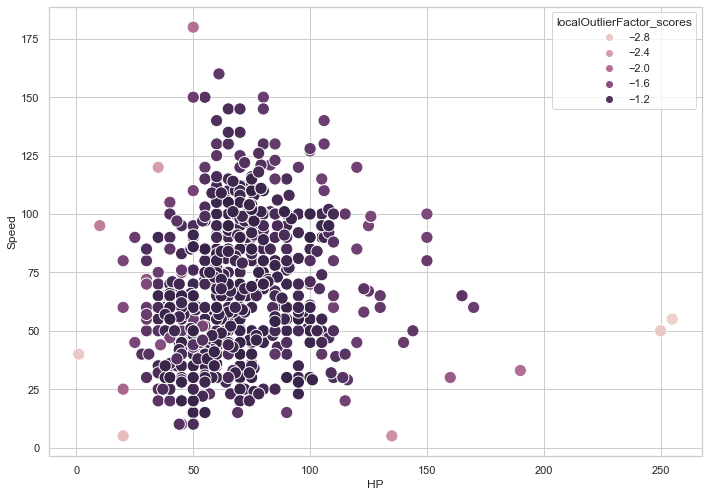

In [13]:
sns.scatterplot(data=data, x="HP", y="Speed", hue="localOutlierFactor_scores", s=150)

### One Class SVM
- A one-class classifier is fit on a training dataset that only has examples from the normal class, but it can also be used for all data. 
- Once prepared, the model is used to classify new examples as either normal or not-normal.
- The main difference from a standard SVM is that it is fit in an unsupervised manner and does not provide the normal hyperparameters for tuning the margin like C. 
- Instead, <b>it provides a hyperparameter “nu” that controls the sensitivity of the support vectors and should be tuned to the approximate ratio of outliers in the data</b>.

In [14]:
clf = svm.OneClassSVM(nu=0.1, kernel='rbf',gamma='auto')
outliers = clf.fit_predict(X)
data['ocsvm_outliers'] = outliers
data['ocsvm_outliers'] = data['ocsvm_outliers'].apply(lambda x: str(-1) if x==-1 else str(1))
data['ocsvm_scores'] = clf.score_samples(X)
data['ocsvm_outliers'].value_counts()

1     413
-1    387
Name: ocsvm_outliers, dtype: int64

<AxesSubplot:xlabel='HP', ylabel='Speed'>

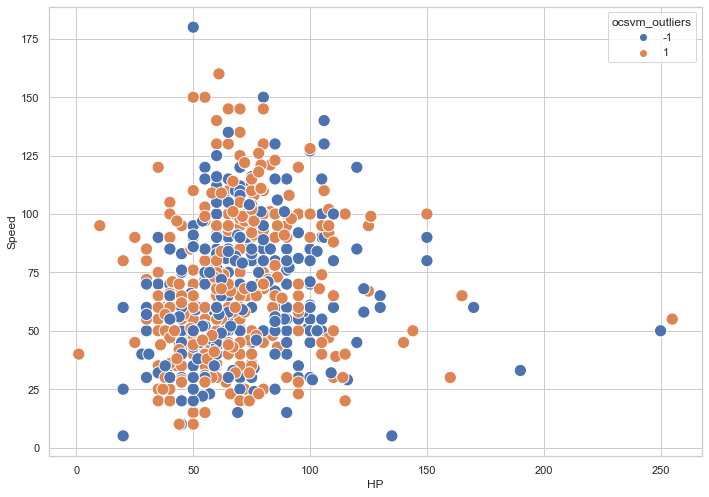

In [15]:
sns.scatterplot(data=data, x="HP", y="Speed", hue="ocsvm_outliers", s=150)

<AxesSubplot:xlabel='HP', ylabel='Speed'>

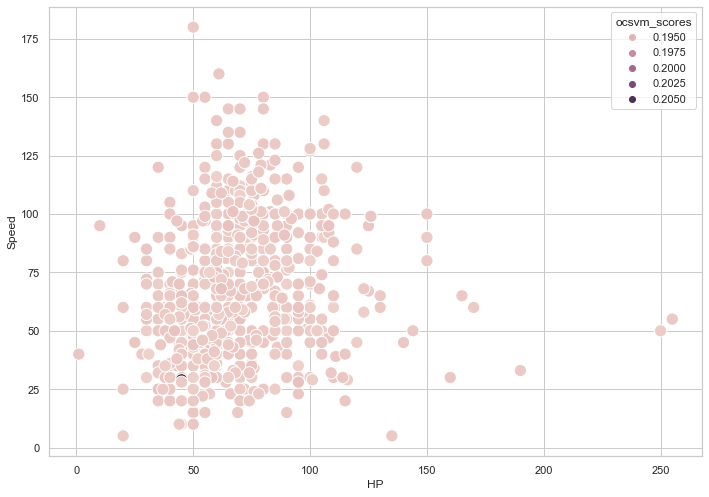

In [16]:
sns.scatterplot(data=data, x="HP", y="Speed", hue="ocsvm_scores", s=150)

It doesn't seem to work in this data :(

### DBSCAN

- Randomly select a point not already assigned to a cluster or designated as an outlier. 

- Determine if it’s a core point by seeing if there are at least min_samples points around it within epsilon distance.

- Create a cluster of this core point and all points within epsilon distance of it (all directly reachable points).

- Find all points that are within epsilon distance of each point in the cluster and add them to the cluster. 
- Find all points that are within epsilon distance of all newly added points and add these to the cluster. 
- Rinse and repeat. (i.e. perform “neighborhood jumps” to find all density-reachable points and add them to the cluster).

<img width=400 height=400 src="https://miro.medium.com/v2/resize:fit:1400/1*rfi9uHjGPdNgXgxe9xWvVw.png">


In [17]:
outlier_detection = DBSCAN(eps = 10, metric='euclidean', min_samples = 5)
clusters = outlier_detection.fit_predict(X)
data['dbscan_outliers'] = clusters
data['dbscan_outliers'] = data['dbscan_outliers'].apply(lambda x: str(1) if x>-1 else str(-1))
data['dbscan_outliers'].value_counts()

1     772
-1     28
Name: dbscan_outliers, dtype: int64

<AxesSubplot:xlabel='HP', ylabel='Speed'>

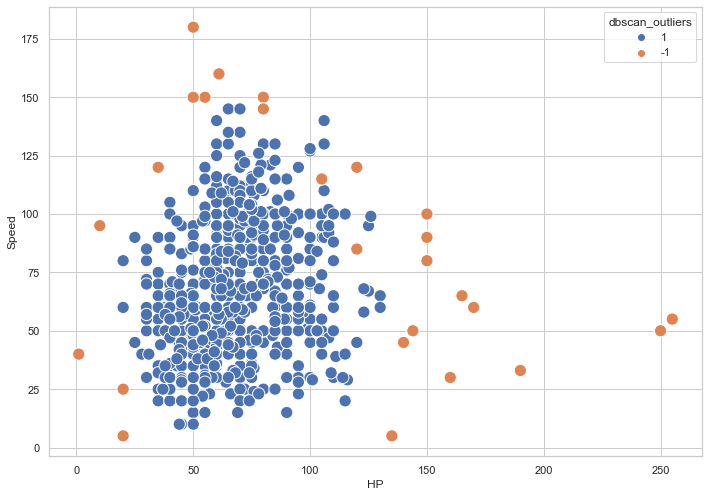

In [18]:
sns.scatterplot(data=data, x="HP", y="Speed", hue="dbscan_outliers", s=150)

### Ensemble



In [19]:
data['outliers_sum'] = data['isoletionForest_outliers'].astype(int)+data['localOutlierFactor_outliers'].astype(int)+data['dbscan_outliers'].astype(int)
data['outliers_sum'].value_counts()

 3    652
 1    115
-1     21
-3     12
Name: outliers_sum, dtype: int64

<AxesSubplot:xlabel='HP', ylabel='Speed'>

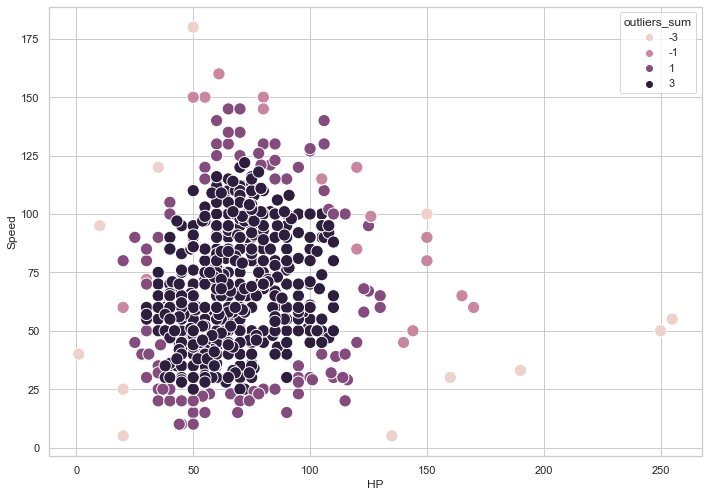

In [20]:
sns.scatterplot(data=data, x="HP", y="Speed", hue="outliers_sum", s=150)

In [21]:
data.loc[data['outliers_sum']==-3]['Name']

55               Diglett
56               Dugtrio
121              Chansey
155              Snorlax
217            Wobbuffet
230              Shuckle
261              Blissey
313              Slaking
316             Shedinja
388              Duskull
431    DeoxysSpeed Forme
495             Munchlax
Name: Name, dtype: object

<AxesSubplot:xlabel='HP', ylabel='Speed'>

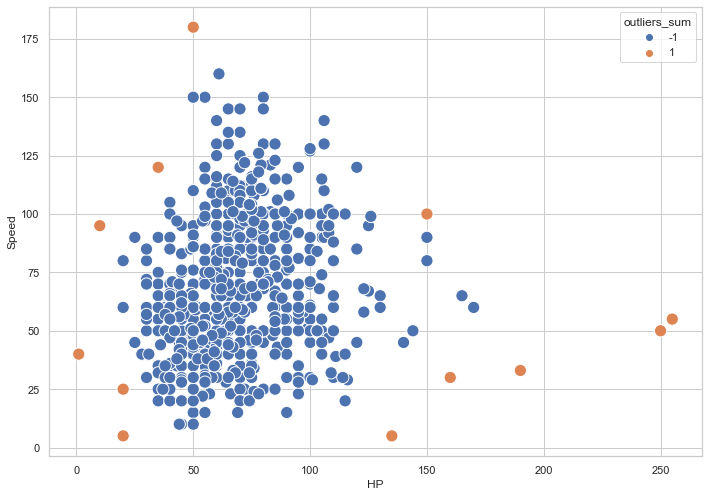

In [22]:
data['outliers_sum'] = data['outliers_sum'].apply(lambda x: str(1) if x==-3 else str(-1))
sns.scatterplot(data=data, x="HP", y="Speed", hue="outliers_sum", s=150)

##   What is the big problem in the above algorithms? 

<hr style="height: 5px;">

# &nbsp;&nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  Automated Anomaly Detection (AAD)

<i>Koren, O., Koren, M., & Peretz, O. (2023). A procedure for anomaly detection and analysis. Engineering Applications of Artificial Intelligence, 117, 105503, Elsevier.</i>

<img src="flow.png" width=600 height=600>

<img src="AAD.png" width=600 height=600>

### How it works?

* Let $F={F_1,…,F_m}$ be a set of features in dataset $D$, and $M$ be a set of $T$ outlier detection techniques, $T > 1$.

* Given a predefined threshold, $0<\beta≤1$,  the method examines the proportional number of outliers. 

* just Let $L(F_i)$ be the number of techniques that found outliers in the $i^{th}$ feature, and  $x_{ij}$ be a Boolean variable indicating one (i.e., True) if $\frac{|A_{ij}|}{|F_i|}$ is higher than $\beta$, and zero (i.e., False) otherwise. The value of $L(F_i)$ is calculated by: 

$$L(F_i) = \sum_{j=1}^{T}x_{ij}$$

* As there are $2^T$ combinations for each feature, the probability of $L(F_i)>1$ can be written as:

$$P[L(F_i)>1] = P[\sum_{j=1}^{T}x_{ij} > 1] = 1- \frac{1}{2^T}$$

* As long as $T$ reach to $\infty$, the above probability can describe the reliability of detecting outliers.

* Next, the method examines the mean differences between the detected outliers and the original feature, only in cases of $x_{ij}=1$. Let $S_{ij}$ be the outliers mean of the $i^th$ feature by the $j^th$ technique, and $\overline{F_i}$, $\sigma_{F_i}$ be the mean and standard deviation of feature $i$, respectively. 

* The method examines the following condition as follows:

$$ \mid S_{ij} - \overline{F_i} \mid \geq \sigma_{F_i}$$


* This can be analyzed in two primary cases:
1. If $ S_{ij} \approx \overline{F_i}$ then $S_{ij}-\overline{F_i}$ reaches zero and the condition <b>does not hold</b>. This means that the outliers and the original feature have almost the same expected value, which indicates a closer distance between those sets.
2. Otherwise, if one of $S_{ij},\overline{F_i}$ is markedly higher than the other, the method satisfies the condition. If so, the average of the outliers detected is far from the expected value of the feature and should be considered outliers. 

<img src="flow2.png" width=600 height=600>

## Example 

https://www.sciencedirect.com/science/article/pii/S0952197622004936